<a href="https://colab.research.google.com/github/brunoras/churn_analise/blob/main/Churn_Classificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Criando um modelo de previsão de Churn de uma Companhia Telefônica

## Importações e Funções

In [9]:
# Pandas:
import pandas as pd

# Visualização:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Utilitários:
import numpy as np
import time

# Scikit-learn:
from sklearn.dummy import DummyClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.neighbors import KNeighborsClassifier, LocalOutlierFactor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, recall_score, roc_auc_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score

# XGBoost
from xgboost import XGBClassifier

# Lightgbm
from lightgbm import LGBMClassifier

In [10]:
def classificadores():
  # Inicializando os classificadores:
  dum = DummyClassifier()
  lrg = LogisticRegression(max_iter=1000, random_state=69)
  knn = KNeighborsClassifier(n_neighbors=15)
  rfc = RandomForestClassifier (random_state=69) 
  xgb = XGBClassifier(learning_rate=0.05, max_depth=20, subsample=0.5, seed=69)
  lgb = LGBMClassifier(learning_rate=0.01, max_depth=20, n_estimators=1000, subsample=0.5, random_state=69)

  modelos = [dum, lrg, knn, rfc, xgb, lgb] 
  return modelos

In [11]:
def treino_teste(modelo, train_x, test_x, train_y, test_y):
  # Treinando o modelo e contando o tempo de treino:
  tic = time.time()
  modelo.fit(train_x, train_y)
  tac = time.time()

  # Prevendo com o modelo:
  test_pred = modelo.predict(test_x)

  # Métricas:
  rep = classification_report(test_y, test_pred, zero_division = False)
  acc = accuracy_score(test_y, test_pred)
  rec = recall_score(test_y, test_pred)
  auc = roc_auc_score(test_y, test_pred)
  tempo = tac - tic

  return rep, acc, rec, auc, tempo

In [12]:
def classificar(X, y):
  # Separando em treino e teste com o split():
  train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

  resultados = []
  for modelo in classificadores():
    # Rodando a pipeline:
    pipe = make_pipeline(MinMaxScaler(), VarianceThreshold(), modelo)
    
    # Treinando os modelos:
    rep, acc, rec, auc, tempo = treino_teste(pipe, train_x, test_x, train_y, test_y)
    cross = cross_val_score(pipe, X, y, cv=5, scoring='recall')

    # Imprimindo o relatório:
    print(f'Modelo: {modelo}')
    print(rep)
    print(f'Cross Validation: {cross.mean():.2f} de recall, desvio padrão de {cross.std():.2f}')
    print(f'Tempo de treino: {tempo:.2f} segundos.')
    print('\n')
    
    resultados.append([modelo, rec, acc, auc, tempo, cross.mean(), cross.std()])
        
  resultados = pd.DataFrame(resultados, columns=['modelo', 'recall', 'acuracia', 'auc', 'tempo', 'cross_val médio', 'cross_val std'])
  return resultados

## Leitura dos dados

In [13]:
df = pd.read_csv('/content/drive/MyDrive/Churn Analysis/Telecom_hard_churn_nocorr.csv')
df

,rev_Mean,totmrc_Mean,asl_flag,totrev,adjmou,adjqty,avgrev,avg6rev,income,creditcd,mou_Mean,change_mou,inonemin_Mean,drop_blk_Mean,attempt_Mean,callwait_Mean,avgmou,avgqty,avg3qty,drop_vce_Mean,blck_vce_Mean,unan_vce_Mean,mou_cvce_Mean,mou_rvce_Mean,owylis_vce_Mean,mouowylisv_Mean,iwylis_vce_Mean,mouiwylisv_Mean,mou_peav_Mean,opk_vce_Mean,mou_opkv_Mean,custcare_Mean,cc_mou_Mean,uniqsubs,area,ownrent,lor,dwlltype,marital,adults,numbcars,months,hnd_price,eqpdays,churn,Customer_ID
0,34.797500,32.490000,0.0,1226.56,1931.0,1022.0,34.02,34.0,9.000000,1.00000,44.000000,35.000000,11.333333,8.666667,36.000000,0.000000,56.79,30.06,19.0,6.666667,2.000000,10.666667,26.750000,5.483333,8.000000,4.586667,4.666667,3.930000,20.200000,5.000000,12.033333,0.333333,7.690000,2.0,12.0,1.000000,5.000000,1.000000,0.000000,2.000000,2.000000,38.0,79.98999,497.0,1,1002418
1,57.007500,55.155000,0.0,1981.41,13140.0,6802.0,49.17,60.0,5.783112,0.68419,710.750000,10.250000,55.333333,4.000000,195.000000,4.333333,355.14,183.84,256.0,1.666667,2.333333,38.000000,228.576667,307.273333,33.666667,31.536667,4.000000,13.976667,248.870000,151.000000,286.973333,0.000000,0.000000,1.0,5.0,0.969681,6.177238,0.283914,1.257937,2.530326,1.567563,38.0,129.98999,56.0,0,1002427
2,51.777500,49.990000,0.0,1967.59,8849.0,4952.0,51.54,58.0,4.000000,1.00000,209.500000,-19.500000,10.000000,7.000000,123.000000,0.000000,239.16,133.84,137.0,0.333333,6.666667,22.666667,83.010000,16.903333,12.333333,8.680000,1.666667,3.390000,66.983333,45.333333,32.930000,0.666667,1.700000,1.0,5.0,0.969681,4.000000,1.000000,1.000000,4.000000,2.000000,38.0,99.98999,163.0,0,1002436
3,57.357500,50.000000,0.0,2380.12,12060.0,6917.0,62.73,56.0,5.783112,0.00000,87.250000,51.750000,7.666667,2.666667,37.333333,0.000000,325.95,186.95,54.0,1.333333,1.333333,5.000000,21.556667,6.943333,9.333333,3.893333,2.000000,1.716667,22.426667,10.666667,6.073333,0.333333,1.933333,1.0,5.0,0.969681,6.177238,0.283914,0.000000,2.530326,1.567563,38.0,29.98999,691.0,0,1002497
4,33.710000,29.990000,0.0,1453.87,7195.0,4049.0,39.10,37.0,5.783112,0.00000,184.750000,4.250000,8.666667,2.666667,78.000000,0.666667,199.86,112.47,95.0,2.666667,0.000000,18.666667,83.380000,27.163333,18.000000,12.946667,0.000000,0.000000,50.623333,31.333333,59.920000,0.000000,0.000000,1.0,3.0,0.969681,6.177238,0.283914,0.000000,2.530326,1.567563,38.0,79.98999,557.0,0,1002607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26402,58.719985,46.179136,0.0,1049.82,3009.0,1949.0,47.14,56.0,5.783112,0.00000,513.559937,-13.933818,23.666667,2.000000,94.000000,0.000000,143.29,92.81,99.0,1.666667,0.333333,26.666667,83.916667,28.483333,19.666667,14.883333,13.333333,13.536667,72.183333,27.000000,40.216667,1.666667,1.116667,3.0,18.0,0.969681,6.177238,0.283914,0.000000,2.530326,1.567563,25.0,149.98999,208.0,1,1099984
26403,85.150000,87.990000,0.0,1532.37,7137.0,1549.0,70.53,96.0,5.783112,1.00000,815.000000,0.000000,39.666667,12.000000,83.333333,0.000000,339.86,73.76,106.0,12.000000,0.000000,15.333333,328.370000,140.973333,9.000000,8.563333,3.333333,8.700000,279.736667,38.666667,189.606667,0.000000,0.000000,3.0,18.0,0.969681,10.000000,0.283914,0.000000,2.000000,2.000000,27.0,199.98999,230.0,1,1099985
26404,71.993333,70.000000,0.0,1887.09,14628.0,5375.0,77.68,74.0,7.000000,1.00000,724.000000,-40.000000,50.333333,15.333333,252.666667,0.666667,636.00,233.70,291.0,14.333333,1.000000,23.333333,449.493333,70.236667,25.666667,32.036667,0.333333,0.583333,491.226667,12.666667,28.503333,0.000000,0.000000,1.0,18.0,1.000000,12.000000,0.283914,0.000000,2.000000,1.567563,30.0,29.98999,882.0,0,1099986
26405,58.719985,46.179136,0.0,1198.48,7181.0,3620.0,55.10,31.0,8.000000,1.00000,513.559937,-13.933818,2.000000,0.000000,6.333333,0.000000,341.95,172.38,13.0,0.000000,0.000000,0.000000,10.653333,1.316667,0.666667,0.433333,0.333333,0.143333,6.886667,3.333333,5.0

## Visualização

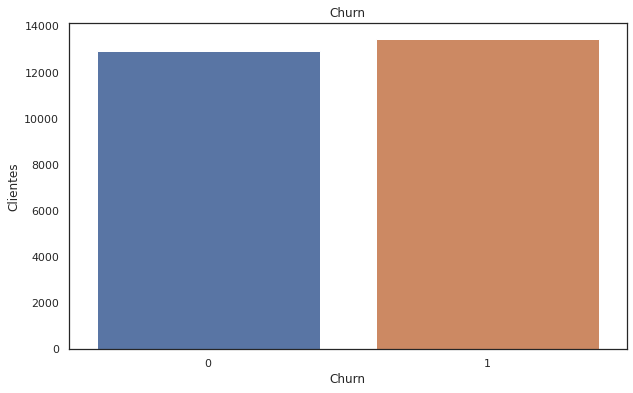

12939
13468


In [14]:
# Histograma por churn:
sns.set(style = 'white')
plt.figure(figsize = (10,6))
sns.countplot(x = df.churn)
plt.title('Churn')
plt.xlabel('Churn')
plt.ylabel('Clientes')
plt.show()
print(len(df.loc[df['churn'] == 0]))
print(len(df.loc[df['churn'] == 1]))

## Testes

In [15]:
X = df.drop(columns=['churn', 'Customer_ID'])
y = df['churn']

In [16]:
classificar(X, y)

Modelo: DummyClassifier()
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2499
           1       0.53      1.00      0.69      2783

    accuracy                           0.53      5282
   macro avg       0.26      0.50      0.35      5282
weighted avg       0.28      0.53      0.36      5282

Cross Validation: 1.00 de recall, desvio padrão de 0.00
Tempo de treino: 0.03 segundos.


Modelo: LogisticRegression(max_iter=1000, random_state=69)
              precision    recall  f1-score   support

           0       0.57      0.55      0.56      2499
           1       0.61      0.62      0.61      2783

    accuracy                           0.59      5282
   macro avg       0.59      0.59      0.59      5282
weighted avg       0.59      0.59      0.59      5282

Cross Validation: 0.65 de recall, desvio padrão de 0.12
Tempo de treino: 0.72 segundos.


Modelo: KNeighborsClassifier(n_neighbors=15)
              precision    recall  f

,modelo,recall,acuracia,auc,tempo,cross_val médio,cross_val std
0,DummyClassifier(),1.000000,0.526884,0.500000,0.028105,1.000000,0.000000
1,"LogisticRegression(max_iter=1000, random_state...",0.620194,0.586899,0.585007,0.724180,0.648188,0.121205
2,KNeighborsClassifier(n_neighbors=15),0.564499,0.548088,0.547155,0.033623,0.581596,0.066402
3,"(DecisionTreeClassifier(max_features='auto', r...",0.647503,0.610564,0.608465,10.353824,0.623469,0.152452
4,"XGBClassifier(learning_rate=0.05, max_depth=20...",0.645347,0.611321,0.609388,33.944507,0.629042,0.131012
5,"LGBMClassifier(learning_rate=0.01, max_depth=2...",0.679483,0.632147,0.629457,11.149857,0.648864,0.151774


Usando o modelo LGBMClassifier, que tem o melhor desempenho dos cinco testados, obtivemos um recall médio de 65%.
Logo podemos estimar que se conseguirmos atingir 50% destes preditos e evitarmos este churn, teremos um aumento mensal no lucro de

2870795.53 x 0.65 x 0.5 = 933008.55

ou seja, um aumento de quase 1 milhão por mês.